Задание 1

In [45]:
import datetime
import pandas as pd
import seaborn as sb

data = pd.read_csv('../data/Electronic_sales_Sep2023-Sep2024.csv')

mostUsedPaymentMethodMap = data.groupby('Customer ID')['Payment Method'].aggregate(lambda x: x.value_counts().index[0])
totalPriceMap = data.groupby('Customer ID')['Total Price'].sum('Total Price')
addOnTotalMap = data.groupby('Customer ID')['Add-on Total'].sum('Add-on Total')

data['Most used Payment Method'] = data['Customer ID'].map(mostUsedPaymentMethodMap)
data['Total spent'] = data['Customer ID'].map(totalPriceMap)
data['Total spent on Add-on'] = data['Customer ID'].map(addOnTotalMap)

data[[
    'Customer ID',
    'Most used Payment Method',
    'Total spent',
    'Total spent on Add-on',
]]

,Customer ID,Most used Payment Method,Total spent,Total spent on Add-on
0,1000,Credit Card,6279.42,66.30
1,1000,Credit Card,6279.42,66.30
2,1002,Credit Card,5020.60,60.16
3,1002,Credit Card,5020.60,60.16
4,1003,Cash,41.50,35.56
...,...,...,...,...
19995,19996,PayPal,27296.78,432.12
19996,19996,PayPal,27296.78,432.12
19997,19996,PayPal,27296.78,432.12
19998,19997,Bank Transfer,2528.26,101.34


Задание 2

In [46]:
def quartal_by_month(month: int) -> int:
    if month < 1 or month > 12:
        raise ValueError("Месяц должен быть в диапазоне от 1 до 12")
    return (month - 1) // 3 + 1

filteredData = data.loc[data['Order Status'].eq('Completed')].copy()

incomeByShippingTypeMap = filteredData.groupby('Shipping Type')['Total Price'].sum('Total Price')
incomeByProductTypeMap = filteredData.groupby('Product Type')['Total Price'].sum('Total Price')

months = filteredData['Purchase Date'].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').month)
quartals = filteredData['Purchase Date'].map(lambda x: quartal_by_month(datetime.datetime.strptime(x, '%Y-%m-%d').month))

filteredData['Month'] = months
filteredData['Quartal'] = quartals

addOnTotalByMonth = filteredData.groupby('Month')['Add-on Total'].sum('Add-on Total')
addOnTotalByQuartal = filteredData.groupby('Quartal')['Add-on Total'].sum('Add-on Total')

In [47]:
incomeByShippingTypeMap

Shipping Type
Expedited     8430385.58
Express       5632093.35
Overnight     5887722.52
Same Day      8292376.50
Standard     14387037.62
Name: Total Price, dtype: float64

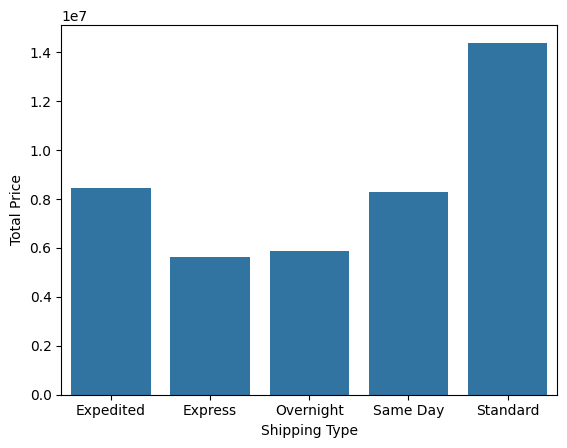

In [48]:
incomeByShippingTypePlot = sb.barplot(incomeByShippingTypeMap)

In [49]:
incomeByProductTypeMap

Product Type
Headphones     2734651.00
Laptop         8365905.25
Smartphone    14407835.84
Smartwatch     9398591.23
Tablet         7722632.25
Name: Total Price, dtype: float64

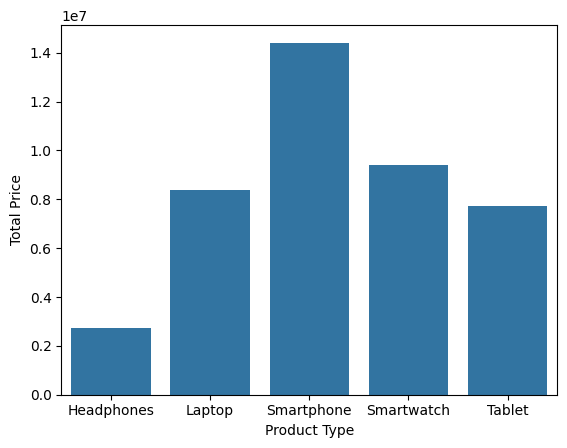

In [50]:
incomeByProductTypePlot = sb.barplot(incomeByProductTypeMap)

In [51]:
addOnTotalByMonth

Month
1     93254.95
2     80253.72
3     84713.93
4     82294.06
5     89374.18
6     84648.60
7     88811.55
8     87861.11
9     71026.37
10    26153.21
11    24453.33
12    22750.23
Name: Add-on Total, dtype: float64

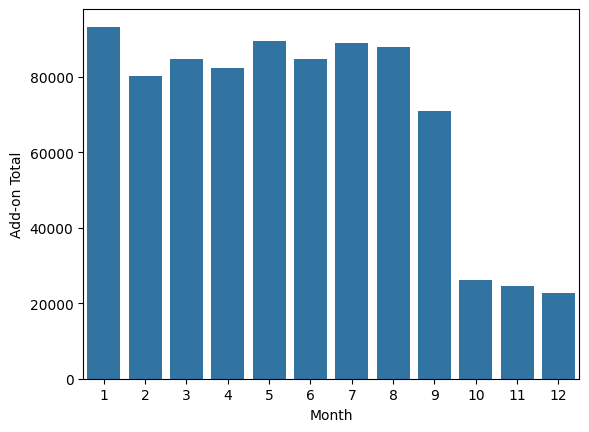

In [52]:
addOnTotalByMonthPlot = sb.barplot(addOnTotalByMonth)

In [53]:
addOnTotalByQuartal

Quartal
1    258222.60
2    256316.84
3    247699.03
4     73356.77
Name: Add-on Total, dtype: float64

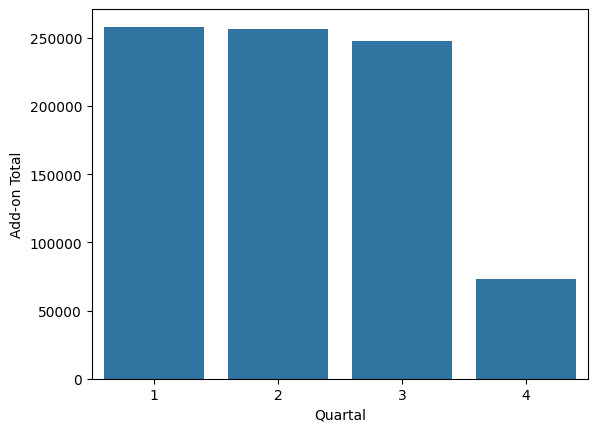

In [54]:
addOnTotalByQuartalPlot = sb.barplot(addOnTotalByQuartal)